# Backpropagation

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=c36lUUr864M&t=2520s

## Chain Rule

Let's say that we have two operations or two functions. First we have the input **x** and then we apply a functon **a** and then we get output **y**. We use this output **y** as the input for our second function **b** and then we get the final output **z**. Now we want to minimze our **z**. So we want to know the derivative of **z** with respect to our **x** here in the beginning. We can do this using the so-called chain rule. For this we first compute the derivative with of **z** with respect to **y** and multiply this with the derivative of **y** with respect to **x** and then we get the derivative that we want.

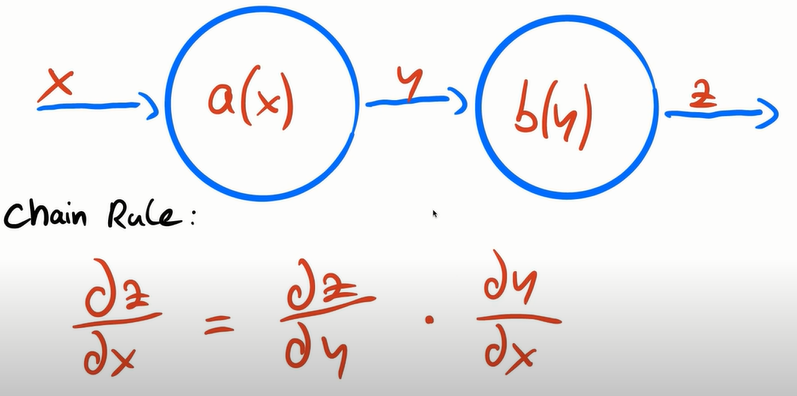

First we compute the derivative of **z** with the respect to **y** and then the derivative of **y** with respect to **x**. Then we multiply them together and get the final gradient that we are interest in.

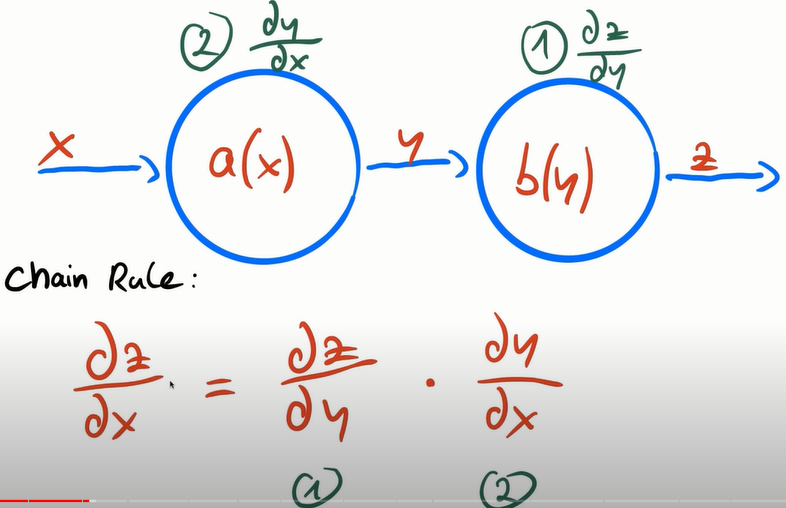

## Computational Graph

For every operation we do with our tensors PyTorch will create a graph for us. At each node we apply one operation or one function with some inputs and then get an output. Here in this example we use a multiplication operation. We multiply **x** and **y** then we get **z**. At these nodes we can calculate so-called local gradients and we can use them later in the **chain rule** to get the final gradient.

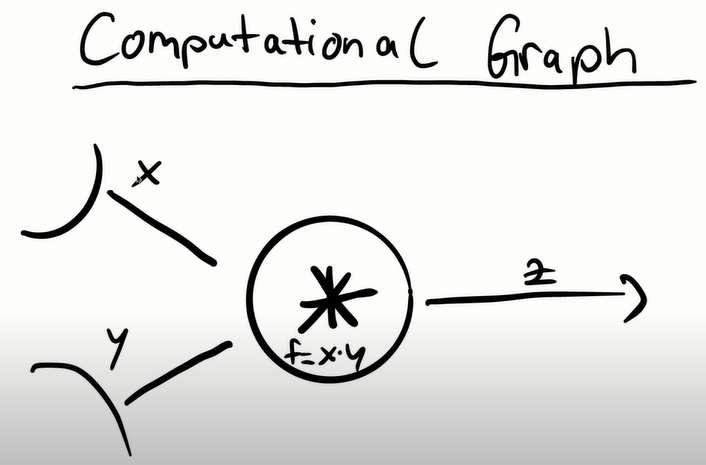

Here the local gradients we can compute two gradients. Gradient of **z** with respect to **x** which is simple since we know tunction here, gradient of **x** times **y** with respect to **x** which equals **y** and same for the second gradient which is a gradient of **x** times **y** with respect to **y** and equals **x**.

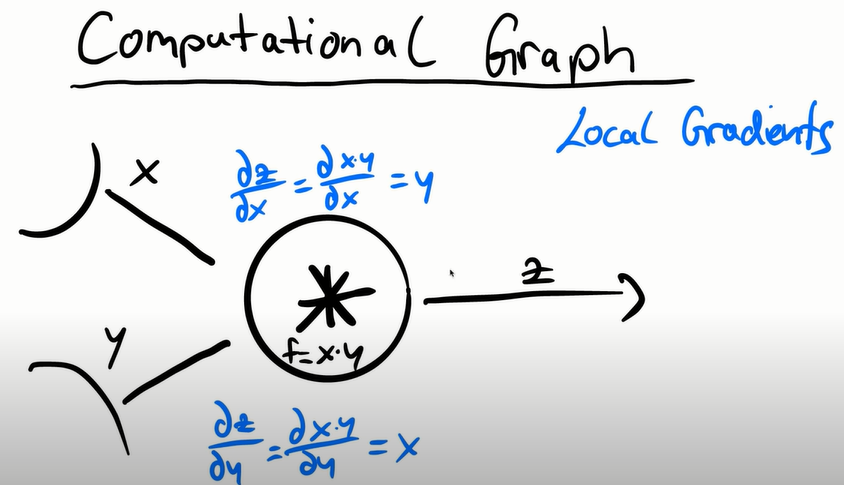

Why do we want gradients? Because typically our graph has more operations and at the very end we calculate a loss function that we want to minimize. So we want to calculate the gradient of this loss with respect to our parameter x in the beginning.

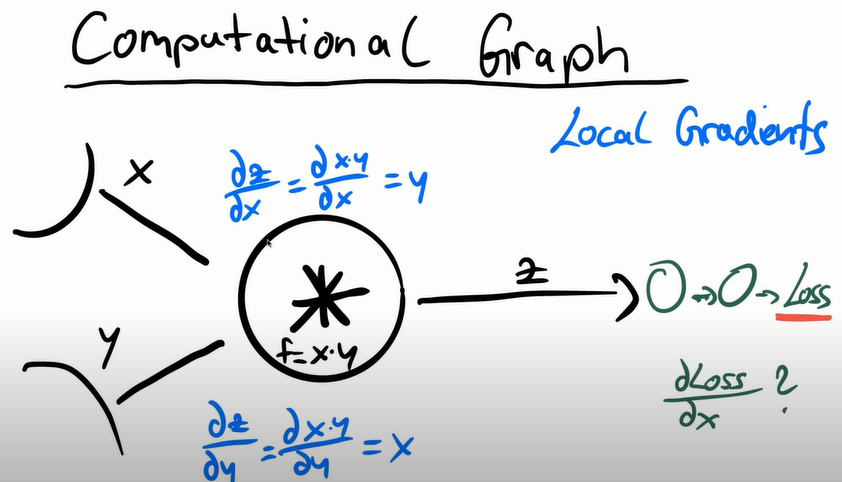

Let's suppose that at **z** position we already know the derivative of the loss with respect to our **z** and then we can get the final gradient that we want. With the chain rule we know that the gradient of the **Loss** with respect to **x** is the gradient of **Loss** with respect to **z** times our local gradient so the derivative of **z** with respect to **x**. This is how we get the final gradient.

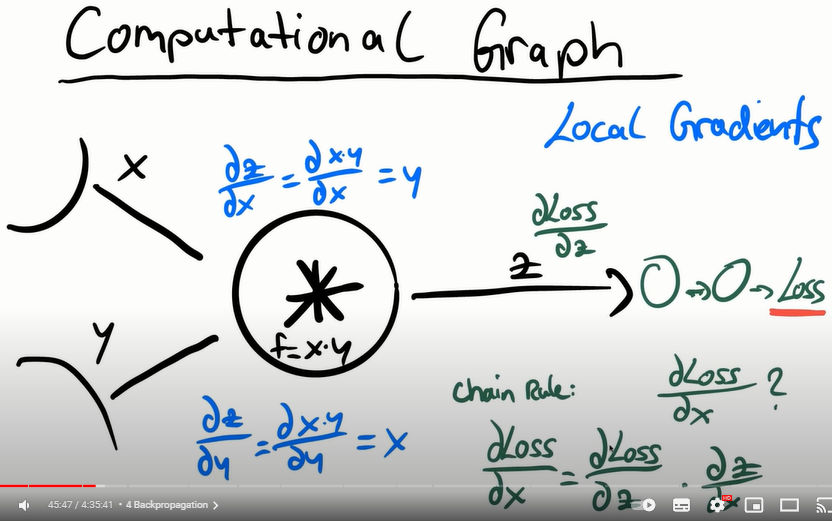

## Concept

The whole concept consists of three steps:

+ Forward pass: Compute Loss
+ Compute local gradients
+ Backward pass: Compute dLoss / dWeights using the Chain Rule

First we do a forward pass where we apply all the functions and compute the loss. At each node we calculate the local gradients and then we do a so-called backward pass where we compute the gradient of the loss with respect to our **weights** or parameters using the **Chain Rule**

## Example

Here we want to use the **Linear Regression**. We model our output with a linear combination of some weights and an input so our predicted **y** is **weights** times **x**. Then we formulate some **Loss function**. In this case **Loss function** is the squared error (It should be mean squared error but we want simplicity). The loss in this example is the difference of the predicted **y** and the actual **y** squared. We want to minimze our **Loss** that's why we want to know the derivative of the **Loss** with respect to our **weights**.

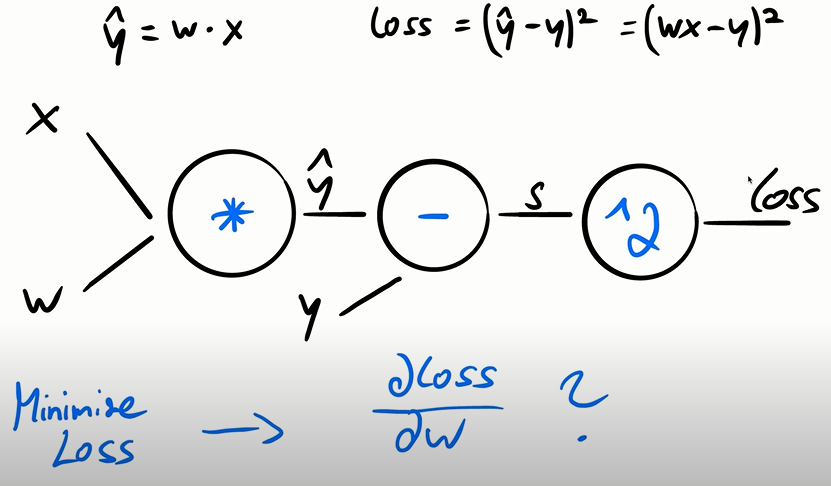

We apply our three steps. First we do a **Forward pass** and put in the **x**, **w** and **y**. After that we apply our functions and then we get the **loss**.

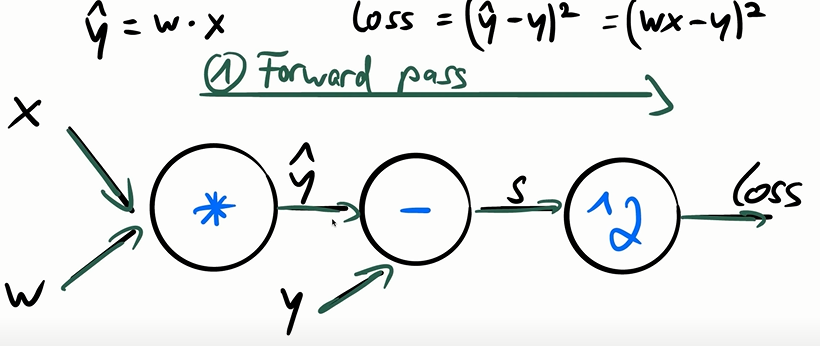

After doing first step we calculate **the local gradients** at each node.

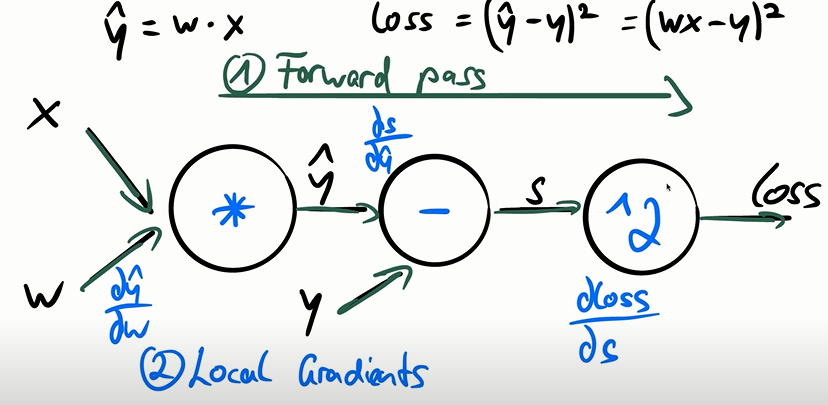

After calculating all **the local gradients** we do a **Backward pass**. We start at the end and first we have the derivative of the **loss** with respect to our **s** and then we also this derivative and **the Chain Rule** to get the derivative of the **loss** with respect to predicted **y** and then again we use the derivative which we calculated and **the Chain Rule** to get the final gradient of the **loss** with respect to the **w**.

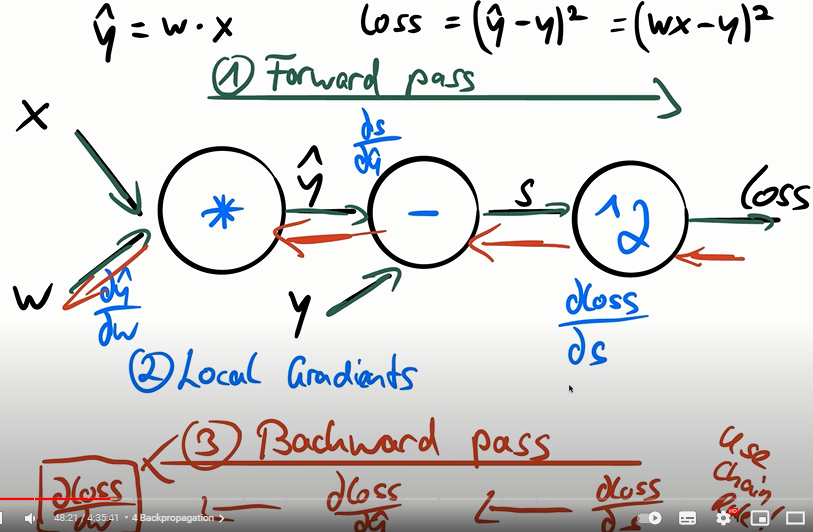

## Exmple with numbers

Let's say that **x**=1 and **y**=2 is our training sample and we initialize our weights with 1.

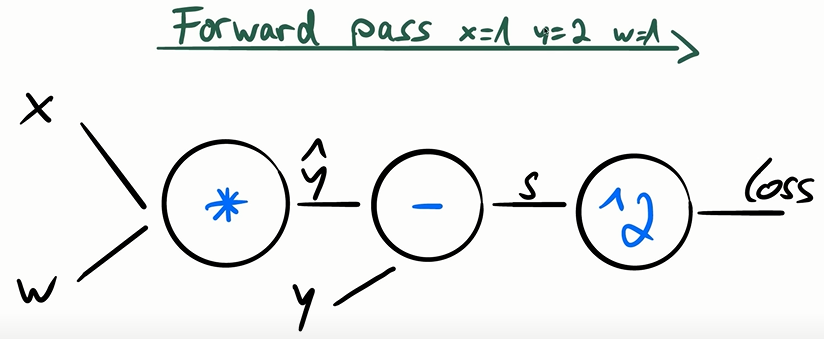

We do a Forward pass so at the first node we multiply **x** and **w** so we get predicted **y**=1. Then at the next node we 
do a subtraction so predicted **y** minus actual **y** which equals **s**=-1 and at the very end we square our **s** so our **loss* is 1.

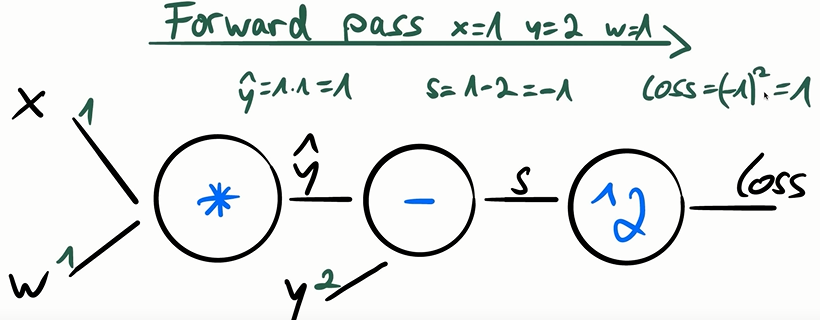

Now we calculate **the local gradients**, so at the last node we have the gradient of **the loss** with respect to **s**
which is 2**s**. At the next node we have the gradient of **s** with respect to predicted **y**. And at the last node we have the derivative of predicted **y** with respect to **w**

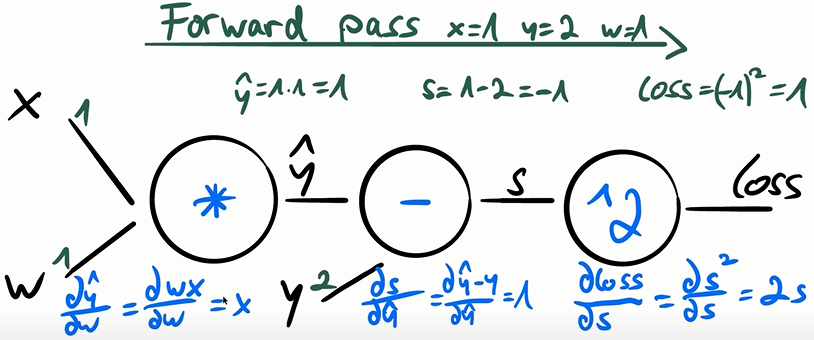

We don't need to know the derivatives of red lines on **Computional Graph**. That's because our **x** and **y** are fixed. We are only interested in our parameters that we want to update.

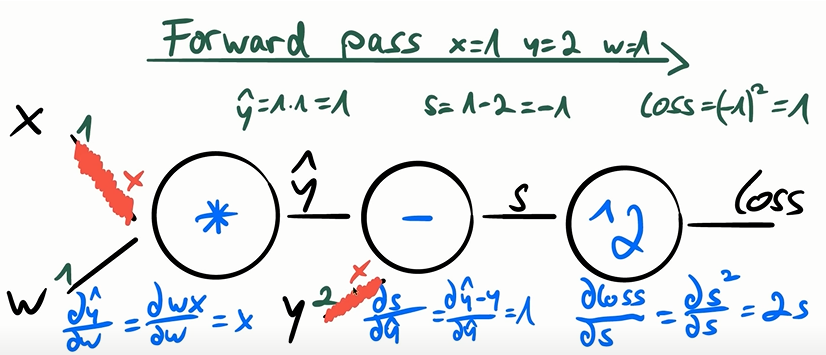

After calculating **the local gradients** we do a **Backward pass**. First we use our **local gradients** to compute the derivative of **the loss** with the respect predicted **y** and here we use **the chain rule** with our two **local gradients** that we just computed. After calculating the derivative we use it and local gradient of predicted **y** with respect to **w** to calculate the final gradient the gradient of **the loss** with respect to **w**.

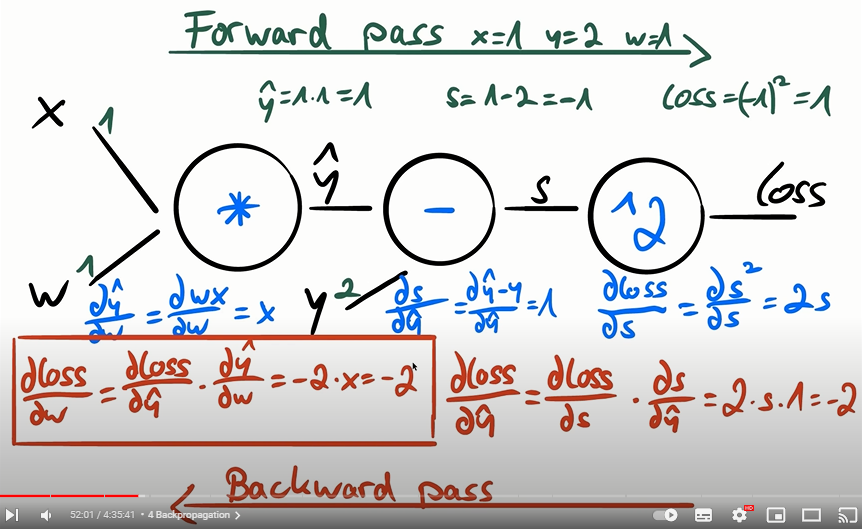

In [4]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [5]:
# backward pass
# PyTorch is computing local gradients automatically for us
# and also computes the backward pass automatically for us
loss.backward()
print(w.grad)

# update weights
# next forward and backward for a couple of iterations

tensor(-2.)
